In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import re
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nithi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [2]:
tweets=pd.read_csv("train.csv",encoding="utf-8")
tweets.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
tweets["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

###### Preprocessing 
- The raw data is messy. It contains non ascii characters, punctuations, numbers, extra spaces, etc 

- So Data preprocessing is the most important step prior to the model building

In [4]:
for text in tweets["tweet"][3:5]:
    print("\n\n",text)



 #model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  


  factsguide: society now    #motivation


In [5]:
stop_words=set(stopwords.words("english"))

In [6]:
stop_words.remove("not")

In [401]:
def text_cleaner(text):
    #converting to lowercase
    newstring=text.lower()
     #fetching all the alphabetic characters
    newstring=re.sub("[^a-zA-Z]"," ",newstring)
    newstring=re.sub("o m a y g a d","oh my god",newstring)
    #removing words inside ()
    newstring=re.sub(r'\([^)]*\)',"",newstring)
    #removing words inside {}
    newstring=re.sub(r'{[^)]*\}',"",newstring)
    #removing words inside[]
    newstring=re.sub(r'\[[^)]*\]',"",newstring)
    #removing stopwords
    #tokens=[w for w in newstring.split() if not w in stop_words]
    longwords=[]
    longwords=[w for w in newstring.split() if len(w)>=2]
    #print(longwords)
    #for i in tokens:
       #removing short words
     #   if len(i)>2:
      #      longwords.append(i)
            
    return(" ".join(longwords)).strip()

In [402]:
text1="Ã°ÂŸÂÂ»Ã°ÂŸÂÂ¸Ã°ÂŸÂÂ¹Ã°ÂŸÂÂŸ #comedians   #cool #igers #igers #instamood"
print("Before Cleaning:",text1)
clean_text1=text_cleaner(text1)
print("After Cleaning: ",clean_text1)
print(len(clean_text1))

Before Cleaning: Ã°ÂŸÂÂ»Ã°ÂŸÂÂ¸Ã°ÂŸÂÂ¹Ã°ÂŸÂÂŸ #comedians   #cool #igers #igers #instamood
After Cleaning:  comedians cool igers igers instamood
36


In [355]:
type(clean_text1)

str

In [403]:
cleaned_text=[]
for i in tweets["tweet"]:
    cleaned_text.append(text_cleaner(i))

In [332]:
len(cleaned_text)

31962

In [371]:
cleaned_text[2162]

''

In [327]:
cleaned_text[0]

'user father dysfunctional selfish drags kids dysfunction'

In [419]:
for i in cleaned_text:
    if (len(i)<1):
        print(cleaned_text.index(i))
        

In [83]:
from ekphrasis.classes.segmenter import Segmenter

In [84]:
seg_tw=Segmenter(corpus="twitter")

Word statistics files not found!
Downloading... done!
Unpacking... done!
Reading twitter - 1grams ...
generating cache file for faster loading...
reading ngrams C:\Users\nithi\.ekphrasis\stats\twitter\counts_1grams.txt
Reading twitter - 2grams ...
generating cache file for faster loading...
reading ngrams C:\Users\nithi\.ekphrasis\stats\twitter\counts_2grams.txt


C:\Users\nithi\anaconda3\envs\tf\lib\site-packages\ekphrasis\classes\exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


#### Function to segmentation of texts

In [405]:
def segment(text):
    l=[]
    newstring=text.split()
    for w in newstring:
        l.append(seg_tw.segment(w))
    return(" ".join(l))

In [406]:
cleaned_tex_seg=[]
for i in cleaned_text:
    cleaned_tex_seg.append(segment(i))

In [253]:
len(cleaned_tex_seg)

31962

#### Spelling correction

In [102]:
from ekphrasis.classes.spellcorrect import SpellCorrector
sp = SpellCorrector(corpus="english")

Reading english - 1grams ...
generating cache file for faster loading...
reading ngrams C:\Users\nithi\.ekphrasis\stats\english\counts_1grams.txt


In [300]:
def spell_correct(text):
    l=[]
    for i in text.split():
        l.append(sp.correct(i))
    return (" ".join(l))

In [407]:
cleaned_tex_seg_correc=[]
for i in cleaned_tex_seg:
    cleaned_tex_seg_correc.append(spell_correct(i))

In [302]:
cleaned_tex_seg_correc

['user father dysfunctional selfish drags kids dysfunction',
 'user user thanks lyft credit cause offer wheelchair vans disapointed get thanked',
 'bih day majesty',
 'model love take time',
 'facts guide society motivation',
 'huge fare talking leave chaos disputes all show and no go',
 'user camping tomorrow user user user user user user user danny',
 'next school year year exams think school exams hate imagine actors life revolution school girl',
 'love land all in cavs champions cleveland cleveland cavaliers',
 'user user welcome',
 'ireland consumer price index climbed previous blog silver gold forex',
 'selfish orlando stand with orlando pulse shooting orlando shooting bigger problems selfish he as breaking values love',
 'daddy today days getting fed',
 'user calls michigan middle school build wall chant tot',
 'comment australia op killing bay sea shepherd help cove dolphins the cove help cove dolphins',
 'ouch junior angry junior yug yo em',
 'thankful pan er thankful positive

###### Replacing all xoxo values

In [408]:
cleaned_tex_seg_correc1=[]
for i in cleaned_tex_seg_correc:
    if re.findall("xoxo",i):
        i=re.sub("xoxo","hugs kisses",i)
        cleaned_tex_seg_correc1.append(i)
    else:
        cleaned_tex_seg_correc1.append(i)

In [409]:
len(cleaned_tex_seg_correc1)

31962

#### Validation Split

In [424]:
from sklearn.model_selection import train_test_split
y=tweets["label"]
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(cleaned_tex_seg_correc1,y,test_size=0.3,random_state=0,shuffle=True)

In [295]:
a=pd.DataFrame({"a":x_train})

In [297]:
for i in a["a"]:
        print(i)

user less five hours euro kicks less hour weekend weekend friday feeling
friendship team work together couple banker hits banker hits banker photo grid back
user user thanks
thank ramadhan ramadhan kareem love holy month masjid
alton towers alton towers smile selfie
finally waiting trying finally found nice people game create group life goals
user bih day dapper
user knows everyone hates game constant surveys like game
model love take time
user haiku bluegrass jealous rhonda vincent last night paradise feet still dancing
goodbye safety hello self employment scared
face euro schedule affects eastenders not fair user
user adve reinforcing insecurities sell products like charity adve fuck off
counting days
finally found delete tweets might find useful well delete tweets
full design mode now playing sexy right said fred
celebrity lionel richie quote invite home interview first room bedroom
giving positive affirmation
herbal sleep remedies work alt ways to heal healthy healing
movie night t

gorilla simulator need adapt environment need tear city material
user dust piano gummy beatz beats
user sociopaths satanic everything abomination norm well committing felonies
independent breit poll shows leave vote ahead slumps blog silver gold forex
donald trump wait nothing good misogynist women like animals
user never convince americans right bear pray for orlando gun control
happy father belgrade guinea bissau
strong resistance lies around commerzbank blog silver gold forex
user good morning bih day girl lhasa apso puppy bih day fur baby fur kid cute user
user happy he as fundraiser suppo charity
chatted user user restaurant user opens month
thought cast sacs photo of the day music insta mood photography insta daily nike family design
weeks days ibiza arghhhhhh
cavs season nba finals game lebron james champions
coffee happiness elvis costello is tax coffee vinyl junkie uk music new wave cover as
birds movie catapults cinema hall little children adults co holing loudly laughter
hap

easy things modified accept love pain moving on
victory sunday we can be heroes spfc
gorilla simulator need adapt environment need tear city material
adult traffic
actors work commercial movie show legally since actor
believe days elasto need preparing
either sleep much don to sleep in between
thankful smiles thankful positive
user tuesday jackie quote take time makes soul enjoy life smile believe dream have fun
playing ernie makes airedale
highly doubt crashed normal people bc poli
user transformation tuesday matter eyes selfie lift lunge
user hired stupid people people hired boss dumb donny don to he con user
princess eugenie caught racism white actors playing chinese
anymore
born salute freddie gibbs bih day freddie gibbs
donald trump would excited move country since sure next president trump reps hate
london queens bih day parade user user waiting majesty arrive
finally found delete tweets might find useful well delete tweets
thing tragedy politicians ngos make sure waste stop bran

netflix month watch orange black season
long till euros predicting france romania tonight euro
even getting want
cheer dangerous caricature person using words understand capitalize tragedy votes
user nothing human user cruel bitter sociopathic soul fled fugly lunatic
keeps policy unchanged blog silver gold forex
tonight moon observation tonight become member astronomy club
tragic story brave little girl
exam today
user good news science says beautiful architecture makes healthy user
user user opps look like forgetting imitates success look like kpop history well
vegan cheat cake oven
user st louis still needs help user thinks survived need office asap ferguson
good morning nack raji ray chell
girls wanna jaunty
user amazing look can to wait
monday kick ass fabulous passion style simplicity xd cct gratitude
baby boys crib new era glad empty nest sooooo proud
always find time laugh auto follow follow back retweet share follow follow photo girl cute
top tags tags not happy crying tears
us

klux klan originally southern democratic terrorize freed slaves republicans sympathized
blonde free online white girl video porn black step
model love take time
model love take time
won base boll teachers ever proud
chill relax insta like beautiful holiday turkey
broken orlando charleston sandy hook first graders folks praying lgbtq lost assault rifles
user introduces scheme state govt says pa ikip ate ekiti separate country
smile reaches fu her fashion skis style blog jw life jw fashion pumps
user user monthsary
user mean people suck wrote book nice nice guys finish first
bih day brother cool the bomb
gulf coast nightlife hour street jazz bistro ocean springs
love relationships boyfriend husband pan er companion someday
sikh temple vandalised calgary condemns
allah soil jews christians muslims believe good prevail msnbc words
user mini mini life mini cooper is times
smile selena gomez senators senators family photo of the day love smile revival
magic music
saddest video entire planet 

tops new york big apple lovely vacation best love sky sk raper
bih day farmer shep love wagyu barry the bull
wait baby girl baby numbe we of jar jr
business oppo unity gorilla simulator need adapt environment need tear
user worry people change facebook profile status tweet empathetic hashtag cdn poli helping
user user need paid better made reason dana hired team lawyers ove up rn
finally legal less months prays god
want teach graders kind considerate community however delete your as account national example
kylie jenner
user live dressage user second user stas ebh to
lucky positive affirmation
keys found computer enjoy life inspiration advice
user board plane bound bordeaux amsterdam euro wales
look like year olds posting dictionary definitions acting proved point
literally best week ever chilling spending week beginnings monday new jobs new life
green morning smoothie green smoothie breakfast insta good healthy breakfast
latest news thanks user indigenous
healthy ever think giving rem

hardcore chapter tiny junior high teen nude
kids thank almighty everyday father love
user store opening ealing broadway sushi international sushi day
forever forever as pathetic forever alone selfie lonely alone as pathetic girl
feeling world russia boycotted gawa aware guys tomorrow russian scum
know things real boss good mood even chat ultimate bias group
lazy beach mood beach summer seaside
biggest aims retreats true happiness
hotel stay month nights yyyy
user internet days closed internet ever
happy alt ways to heal healthy
user opinion
user magnificent monday monday morning monday motivation monday indra loka
thankful forgiveness thankful positive
user sheer waste hours watching much noise crap ud tha punjab
user going bayshore tommorow user bayshore bestie
user feels explains people thinking
user user user really looking forward coming as long coming user
user user father is day quotes
much missing like crazy another gone closer love user
people world baffle someone else number o

potus let is isis am ok countries possibly infiltrating blames conservatives abiding owners
literally delete reinstall apps everything updated
super blooms dahlias my garden summer wild flowers home
love much lucky luck love
grow outside never love grow learn inspire believe achieve
first bath zoe the destroyer cairn terrier shih tzu ca iz up face stinky pup
as work saturday freedom love
user in have no friends someone come with me
user retweet truly made life user
rory show ufc ottawa
beekeeping collection alexandra grimm good read amazon reading farming
game going epic zelda gamer nerd
last night cea inly look like anymore suicide norman selfie love
believe life
park place junior dedicated making dentist experience kids dentist
attack bull chase leave despite fact strong source food
vent il wars dance bike
user beloved gurudev happy bih day love sweet lord
actually by huss watch geordie shore knowing user longer gonna
accepted offer position work change
user ls tv nice unbiased chann

user england finna shit time ahhhhh
ready one team lincoln user user user user
love living seaside view summer love it home june alleys wandering katja by myself
bih day year anny coming july best month year
little customer decided send lovely picture thank play
sometimes friends matter live friends long distance lgbt lgbtq
retro pic bih day nick rhodes history oldschoolcool
decorative shop cool home
user like mexico come whit show
user potus unqualified ever hold office narc icc is tic lectures guidance
face hahaha feeling work today beautiful stuck inside
prayers ones survived drove omar mateen orlando shooter
user hello email address special requests occasions note stay july bih day
know love drops water golf course golf sunrise mount tabor
user allah soil odds dying extremist violence roughly emiratis
can to help look back crying
cat with toy catnip colours feathers cute play playing blackenedwhite
user user launch restaurant tuesday buzzing
awesome wwdc twitter stream languages pe

nice milkshake cool running dunes paying amusements steffie
knows talking rrrr eevee nnn
life make choose make mine happy full laughter welcome join love my life
father user
user lunch friend love food insta food past as pasta delicious lunch holiday
good morning saturday storm moving east bye bye
amateur spanking vids women workplace
little morning yoga never killed anyone fitness
love happy fail must first semester murdoch delight
dining tonight user bih day treat another restaurants world can to wait
absolute favourite love couple boyfriend favourite cute lucky
struggle real classroom school sunday eff infinite kpop
black feel like stomping retweet tampa miami
user ashamed urself looked time feel lowest corruption
week lost mexico lost little brother lost golden state wanna suck lose bad week
sums changed energy premium nutrition love my life
comment for comment bull hill climb reach target complete task survive
user viu al reality oculus rift htc vive studio twitter follow tickets 

user time street sessions draw money tweets world monetary affairs
today marks special year really happy work smile
killed another yesterday personal training recording smile singer music music is life
user user user user typical trump suppo er really believe going build wall
bitches summer celebrate friends barcelona
father is wonderful father is enjoy fullest
user inside user user event
saturday night niece sleepover exploring
control everything enjoy nothing live moment relax mindful wisdom life
filming stand chelsea
reservation house
user yeah watching match
blonde youtube porn
grimace photo session grimace mcdonald is little family felix josua love
official countdown sta ed three months kyle married
user loving fact book available user online love pubs uk pubs new book
really last fried chicken
user hidden america rampant blatant racism user user user user
user great others suppo ing totally awesome insanely vibing disco mix
love morocco like like follow me follow follow marrakesh

user official brother married cou marriage awaiting actually wedding ceremony
time blog blog blogging
user passion comes full circle want orlando trump pulse disney aching child disney
straight whore
orlando right truly cannot imagine could easily happened anywhere
charity fundraising director comments previously used systems jun ari crm comprehensive simplest
slowly growing
days first harvest harum man is mango tan am sendiri
ever afraid show really long
user upstairs loaded roaches staff joke
americans spend money user cb insights
actually belly chuckled
punjab indebted always
happiness real shared madrid relax or culo bella is
weekend selfie yolo hugs kisses like like
user listen beautiful best friend user singing amazing voice
thank user kids taught magic happy morning childhood wisdom gratitude
fa hers as ameer baap
body toddler snatched gator recovered
like father
user user user user long nashville tour nashville forever
genuinely playing ring fire user made rule every ignore lit

bih day user
loved good book romantic tale told perspective
eyebrow game weak
time unwind relax different view bicol
user mock
inventive positive affirmation
cool message things work person messaging know does sssssss
historian whitewashing ukraine past ukraine volodymyr via trov ych history whitewashing jews nazis
elections bullshit happens bother fact check losers you re all doomed
dazzling positive affirmation
model love take time
michigan user medical cannabis cup say high
dark forest thailand bangkok lumpini park forest evening light relax cold good
hope show feminist reproductive rights bih control
user sooooo
stunning colours as long morning route today june
actually stopped raining bike ride cycling
user news boyfriend confused
good thought live positive life positive positivity law of attraction
user increasingly angered leave campaign stupidity blinkered lost for words
famous founders remained company
user people forgotten simplest commandment love neighbor
expect lots folks 

user long gran canaria cocktails sunshine relaxing time
days an evening with cyrus eat scottish user user user user user sponsorship
me at industry apathy towards animal suffering make feel he as broken animal abuse
quote quotes love he as break broken
agree thomas jefferson motivation inspiration strength healthy
feeling finally life pretty much figured life goals love
weekend snap kind of lifestyle weekend beach life lifestyle love bershka
user word broad people agree triggered
defunding as boi on sending inauguration
thesis grad photo shoot sablay
user user real life esco prostitute
country argues different shades black
user user channels connection life frustrated
trump corrupt gop user user history erased money power
ibiza calling ibiza calling summer love life levi da cruz living thank you
fathers day fathers day
music therapy tool healing alt ways to heal healthy
user user user much
grateful father
herbal sleep remedies work alt ways to heal healthy healing
tickets great moscow 

spread love happiness black lives matter morning
first stint stas monday time hands experience hindalco logistics user abg lp hindalco
user thank giggles freckle results
good morning sincerely
fabulous weekend beautiful souls no filter
ultimately alone depressed depression depressing broadchurch vine user
user came know love pan er become committee crime humanity
im mo alise family memories cookout food
bored anyone want cheer
flame twitter politics days delete your account
user dearly missed pray for christina rip christina may your hea open
idea come
bull hill climb reach target complete task survive strong excitement
quotes rains like like love lil swag follow follow money
user house burnt working towards network renewal mitb epic user event missed kick off
waiting arrival sister nephew missed
happy smiling kitty cats home but to smiling kitty
crossover join family name released would call
place love summer beach swim sun and sand get fit bikini
user waiting somebody call anybody
wa

stay relevant open mouth tell people is buisness
anyone else family member thrives back stabbing actual family grrr in keel up
finally inside manifold location work location tgif
united states total flows blog silver gold forex
user shopping time girls my mood my time be in life vacation mark antalya
sit back and relax may the force be with you selfie airco bye bye belgium brussels airco
tell not happy rogans load house by sams user
truth police maga audible channels
born test tube father
really feelings
even though working nearing tuesday tuesday rest
friday break room panel user user user talking teen pai es trump dating guns
user great ai cle truth needs comments back needed in digne nous user
cena cumple thanks birthday home family
user really needed buffalo ranch chicken sandwich tonight sadly available anymore please bring back
de corazon bull hill climb reach target complete task survive strong eci
model love take time
scream episode
looking positive today love smile
making elde

#### Padding

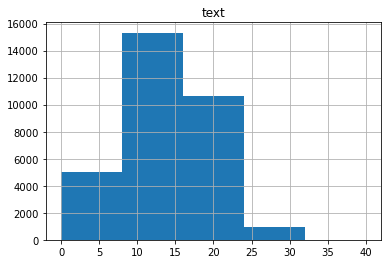

In [425]:
import matplotlib.pyplot as plt
text_word_count=[]
for i in cleaned_tex_seg_correc1:
    text_word_count.append(len(i.split()))

length_df=pd.DataFrame({"text":text_word_count})

length_df.hist(bins=5,range=(0,40))
plt.show()

###### From the above histogram, we observe that most of the sequences fall under the length of 15. So, let us fix maximum length of sequence to 15.

In [426]:
max_len=15

###### Because of the way NN work, we need to convert ech text in the form of sequences of tokens

In [427]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer=Tokenizer()
###Creating index for a word
tokenizer.fit_on_texts(list(x_train))

#converting word seq to integer seq
x_train=tokenizer.texts_to_sequences((x_train))
x_test=tokenizer.texts_to_sequences((x_test))

#padding with zero

x_train=pad_sequences(x_train,maxlen=max_len,padding="post")
x_test=pad_sequences(x_test,maxlen=max_len,padding="post")

vocabulary=len(tokenizer.word_index)+1
print("Vocabulary Size:",vocabulary)

Vocabulary Size: 21267


##### Displaying word index

In [265]:
tokenizer.word_index

{'user': 1,
 'in': 2,
 'to': 3,
 'the': 4,
 'as': 5,
 'is': 6,
 'you': 7,
 'my': 8,
 'of': 9,
 'and': 10,
 'for': 11,
 'day': 12,
 'it': 13,
 'love': 14,
 'on': 15,
 'this': 16,
 'with': 17,
 'be': 18,
 'up': 19,
 'me': 20,
 'so': 21,
 'all': 22,
 'that': 23,
 'happy': 24,
 'are': 25,
 'we': 26,
 'your': 27,
 'life': 28,
 'have': 29,
 'at': 30,
 'am': 31,
 'do': 32,
 'amp': 33,
 'just': 34,
 'like': 35,
 'not': 36,
 'will': 37,
 'can': 38,
 'good': 39,
 'new': 40,
 'when': 41,
 'time': 42,
 'fathers': 43,
 'by': 44,
 'today': 45,
 'but': 46,
 'what': 47,
 'from': 48,
 'now': 49,
 'he': 50,
 'no': 51,
 'bih': 52,
 'out': 53,
 'positive': 54,
 'thankful': 55,
 'people': 56,
 'was': 57,
 'get': 58,
 'how': 59,
 'our': 60,
 'one': 61,
 'go': 62,
 'about': 63,
 'they': 64,
 'more': 65,
 'don': 66,
 'see': 67,
 'smile': 68,
 'or': 69,
 'if': 70,
 'fun': 71,
 'friday': 72,
 'summer': 73,
 'work': 74,
 'who': 75,
 'want': 76,
 'weekend': 77,
 'take': 78,
 'orlando': 79,
 'healthy': 80,
 'great

In [428]:
from keras.utils.np_utils import to_categorical

y_train=to_categorical(y_train,num_classes=2)
y_test=to_categorical(y_test,num_classes=2)

In [430]:
for i in x_train:
    
    if sum(i)==0:
        print(i)

In [431]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding
from keras.callbacks import EarlyStopping,ModelCheckpoint
import keras.backend as K
K.clear_session()
model=Sequential()
model.add(Embedding(vocabulary,100,input_length=max_len,trainable=True,mask_zero=True))
model.add(LSTM(300,dropout=0.1,recurrent_dropout=0.2))
model.add(Dense(64,activation="relu"))
model.add(Dense(2,activation="sigmoid"))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 15, 100)           2126700   
_________________________________________________________________
lstm_1 (LSTM)                (None, 300)               481200    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                19264     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 2,627,294
Trainable params: 2,627,294
Non-trainable params: 0
_________________________________________________________________
None


In [432]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["acc"])

In [28]:
#es =EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2, min_delta=1e-7)
#mc=ModelCheckpoint("best_model.h5",monitor="val_loss",mode="min",save_best_only=True,verbose=1)

In [433]:
history=model.fit(np.array(x_train),np.array(y_train),batch_size=1000,epochs=50,validation_data=(np.array(x_test),np.array(y_test)),verbose=1)#,callbacks=[es,mc])

TypeError: Can not convert a NoneType into a Tensor or Operation.

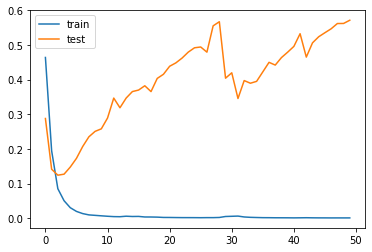

In [46]:
from matplotlib import pyplot
pyplot.plot(history.history["loss"],label="train")
pyplot.plot(history.history["val_loss"],label="test")
pyplot.legend()
pyplot.show()

###### Over fitted model-  Line plots of the loss (that we seek to minimize) of the model on train and validation datasets will show a line for the training dataset that drops and may plateau and a line for the validation dataset that drops at first, then at some point begins to rise again.

In [51]:
es =EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2, min_delta=1e-7)
mc=ModelCheckpoint("best_model.h5",monitor="val_loss",mode="min",save_best_only=True,verbose=1)

In [52]:
history=model.fit(np.array(x_train),np.array(y_train),batch_size=1000,epochs=50,
                  validation_data=(np.array(x_test),np.array(y_test)),verbose=1,callbacks=[es,mc])

Train on 22373 samples, validate on 9589 samples
Epoch 1/50
22373/22373 [==============================] - 23s 1ms/step - loss: 0.5071 - acc: 0.8781 - val_loss: 0.2978 - val_acc: 0.9352

Epoch 00001: val_loss improved from inf to 0.29776, saving model to best_model.h5
Epoch 2/50
22373/22373 [==============================] - 20s 881us/step - loss: 0.2543 - acc: 0.9374 - val_loss: 0.2008 - val_acc: 0.9499

Epoch 00002: val_loss improved from 0.29776 to 0.20081, saving model to best_model.h5
Epoch 3/50
22373/22373 [==============================] - 22s 965us/step - loss: 0.1353 - acc: 0.9608 - val_loss: 0.1335 - val_acc: 0.9575

Epoch 00003: val_loss improved from 0.20081 to 0.13354, saving model to best_model.h5
Epoch 4/50
22373/22373 [==============================] - 22s 968us/step - loss: 0.0707 - acc: 0.9797 - val_loss: 0.1311 - val_acc: 0.9593

Epoch 00004: val_loss improved from 0.13354 to 0.13114, saving model to best_model.h5
Epoch 5/50
22373/22373 [=============================

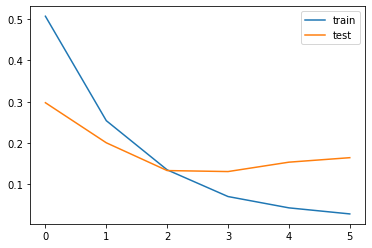

In [56]:
from matplotlib import pyplot
pyplot.plot(history.history["loss"],label="train")
pyplot.plot(history.history["val_loss"],label="test")
pyplot.legend()
pyplot.show()

##### Even after using early stopping method validation loss is increasing.

In [57]:
from keras.models import load_model

In [58]:
model = load_model('best_model.h5')

In [59]:
import pandas as pd

In [60]:
data=pd.read_csv("test_tweets_anuFYb8.csv")

In [67]:
l=[]
new_pred=model.predict(x_test)
for i in new_pred:
    print(max(i))
    #l.append(predict_prob=max(all_predictions[0]))

0.9997598
0.9990585
0.99627453
0.9991106
0.9998207
0.9978564
0.99977577
0.999645
0.99936116
0.94007987
0.99734974
0.9183184
0.99775815
0.9913542
0.9992986
0.90453345
0.99975306
0.9295365
0.9983914
0.98093355
0.9834329
0.9906255
0.9992386
0.99991596
0.5946262
0.9976946
0.9997475
0.99937356
0.989867
0.9992759
0.99993455
0.9817666
0.9586922
0.9984
0.9991759
0.98385584
0.99738187
0.9994126
0.9998816
0.96127605
0.99806285
0.9994329
0.99856067
0.9897466
0.99988663
0.9997208
0.5503677
0.9997323
0.9899584
0.8809489
0.9298655
0.481261
0.9987644
0.9979708
0.99989736
0.9997179
0.9996457
0.9987712
0.9061904
0.99982154
0.9997162
0.8114302
0.7522102
0.9663117
0.9993144
0.9999058
0.91164625
0.99974173
0.99890417
0.9813507
0.98670554
0.9923286
0.9998025
0.7420491
0.98537385
0.9978727
0.99979043
0.9993712
0.9108156
0.9937073
0.98925257
0.992298
0.991518
0.9975506
0.99960065
0.9935116
0.9999219
0.9993427
0.99881005
0.970628
0.9991678
0.9996774
0.96033454
0.9999027
0.83980227
0.9912641
0.99964476
0.98096

0.99174005
0.9993789
0.99829775
0.99318093
0.9996905
0.99836206
0.9990946
0.9961706
0.9987594
0.99931026
0.8890158
0.99981016
0.9980687
0.88059366
0.9978651
0.9993193
0.9065911
0.9746826
0.9996574
0.99984133
0.9996283
0.88306063
0.99167025
0.8611429
0.99485004
0.9985585
0.99971926
0.9998811
0.99972147
0.98541147
0.9945644
0.9998757
0.9998418
0.99932253
0.9998753
0.94505155
0.9983423
0.9093256
0.99959946
0.9994651
0.99910307
0.9988651
0.99964774
0.99949837
0.9997399
0.74991393
0.8250581
0.99779165
0.99903023
0.9993491
0.98829824
0.95121014
0.9997914
0.9996526
0.98986465
0.99662554
0.99234223
0.9599699
0.90220225
0.9998945
0.998214
0.5071712
0.99940765
0.9997716
0.9993717
0.99463624
0.9992085
0.9884678
0.888764
0.9995997
0.9994575
0.9998642
0.99951875
0.99915135
0.998747
0.9998453
0.5346862
0.79579425
0.99986625
0.9990161
0.99965364
0.9989345
0.9986261
0.99977696
0.9997169
0.9993005
0.92234087
0.99901783
0.9922707
0.999854
0.9997465
0.8357092
0.999858
0.99239874
0.999251
0.99920714
0.858

0.9997407
0.91229725
0.99841297
0.9987563
0.9963223
0.9241935
0.99024004
0.86890376
0.7286861
0.9992387
0.9962115
0.9990679
0.9976325
0.9916857
0.99988365
0.9994931
0.9900491
0.9978131
0.9992385
0.61847985
0.89942956
0.9946621
0.99722075
0.9520337
0.999897
0.9996351
0.99960464
0.9938577
0.99944055
0.9992093
0.98964703
0.99954903
0.99057496
0.9706664
0.9998348
0.9997475
0.99928975
0.9811659
0.9984914
0.9983758
0.9976723
0.99978995
0.99930525
0.9999143
0.9860144
0.99752694
0.9991786
0.999533
0.9993971
0.9963039
0.91695
0.99904215
0.99925536
0.99924004
0.99893975
0.9988139
0.99951196
0.9998108
0.9975189
0.9995887
0.99978065
0.9983146
0.9999164
0.99964595
0.99954045
0.9773762
0.9998025
0.9991175
0.99917495
0.5935734
0.96222436
0.9983726
0.9979925
0.99967957
0.99665487
0.92574227
0.98053515
0.9997945
0.9995582
0.99590397
0.9978994
0.99714476
0.600916
0.99986386
0.984246
0.9992398
0.99618363
0.99610436
0.99896705
0.99822414
0.53578717
0.99369967
0.9990659
0.99793935
0.9990537
0.9842366
0.995

0.9997266
0.9984478
0.9992759
0.63972956
0.999756
0.99932325
0.99318796
0.99979323
0.9995887
0.9879546
0.9997299
0.99768305
0.99950147
0.91253865
0.99854314
0.99669755
0.99889266
0.9999571
0.9992759
0.9891118
0.9976208
0.9878237
0.9834347
0.9988347
0.99989873
0.8349345
0.7351299
0.9989799
0.67192173
0.99782175
0.99977326
0.9976933
0.9998449
0.9992759
0.9994004
0.99984986
0.9042864
0.9992759
0.99777496
0.9968122
0.9994714
0.98809886
0.9965651
0.99152863
0.9996925
0.9989177
0.99427986
0.9703865
0.9996042
0.99944246
0.99763644
0.9984478
0.9997615
0.9996853
0.99982214
0.9985192
0.9628134
0.99918187
0.99954486
0.9658346
0.9058417
0.9990254
0.99970675
0.99446833
0.5616047
0.99983525
0.99978995
0.9984756
0.9994812
0.9975655
0.9915556
0.9983726
0.99821115
0.9974162
0.957495
0.95444465
0.9992505
0.99984497
0.9991491
0.99217486
0.9209156
0.99762976
0.99979305
0.99964565
0.99887186
0.995144
0.99942976
0.98203504
0.995311
0.99298036
0.9993311
0.9995803
0.90577847
0.9824279
0.9992683
0.99943733
0.9

0.59301233
0.9998472
0.9963943
0.63372076
0.99957883
0.99861217
0.9993546
0.9947703
0.9990982
0.99953187
0.9975319
0.9987611
0.9977344
0.99990714
0.99988115
0.9988463
0.99967134
0.99907887
0.9910816
0.9990026
0.99642026
0.9367671
0.8384646
0.99986297
0.9992759
0.9997338
0.999687
0.99453473
0.9975311
0.99468315
0.9993767
0.9975883
0.99980664
0.9995637
0.99961615
0.5664538
0.99451625
0.99753344
0.99631006
0.9918505
0.9970884
0.8896244
0.98407245
0.9997054
0.99973154
0.9999094
0.99747735
0.99759597
0.98815536
0.99955255
0.99932694
0.8936646
0.99610424
0.9985391
0.9985684
0.99989235
0.9917041
0.9999273
0.99961346
0.9993944
0.96994317
0.9992037
0.99884164
0.9996289
0.9953691
0.99990726
0.83578914
0.9996371
0.7548038
0.98235804
0.99946344
0.9986756
0.9986813
0.9926696
0.999315
0.9989155
0.9994353
0.5563176
0.97476876
0.999895
0.9998558
0.81275755
0.9956232
0.99177575
0.9951215
0.9981247
0.9802325
0.99193025
0.9851898
0.9991121
0.99960583
0.82701254
0.98300385
0.9992942
0.96677876
0.9997414
0

0.9997607
0.9999119
0.99936545
0.9650346
0.9296237
0.8228383
0.9819752
0.9990163
0.99834734
0.99944794
0.9987427
0.99965477
0.99976516
0.9756237
0.52288723
0.9992157
0.9992487
0.999691
0.9658775
0.9990995
0.68879
0.9972484
0.9974042
0.99971914
0.99862516
0.8080355
0.99986416
0.9946092
0.9996072
0.9500886
0.98293144
0.9996754
0.9398093
0.9999209
0.9594728
0.8406435
0.9858695
0.99976426
0.9971575
0.9993504
0.9995781
0.939115
0.98146796
0.53117204
0.998007
0.9377493
0.99980664
0.99986875
0.99978817
0.96781176
0.6112578
0.9993104
0.994308
0.56936353
0.94021523
0.99991894
0.99972916
0.9998604
0.9659978
0.95797133
0.9981052
0.9994432
0.9998187
0.99043447
0.99962604
0.990885
0.99687326
0.98880327
0.9581319
0.9087422
0.9982954
0.99886423
0.977494
0.99903035
0.995214
0.97346175
0.99971724
0.9995029
0.99851286
0.99961686
0.9996654
0.9944029
0.999429
0.9803461
0.99991274
0.98831403
0.99971557
0.99809253
0.9994576
0.9950175
0.99446344
0.99952126
0.99939036
0.99401295
0.9993065
0.97040814
0.9369892

0.961499
0.99966514
0.99975526
0.99823
0.99284005
0.9995948
0.9995637
0.99932075
0.9994693
0.9989757
0.9978862
0.9977435
0.9585992
0.999128
0.99575406
0.98097384
0.97547895
0.9925112
0.99970293
0.9941643
0.99961567
0.9994664
0.76249015
0.9931066
0.9968588
0.99844587
0.99960876
0.99700785
0.9512818
0.91555786
0.54643494
0.99976856
0.6651961
0.99826175
0.9980905
0.9993992
0.996826
0.6766069
0.9862474
0.81022143
0.95390207
0.9996357
0.99944466
0.9992943
0.9941443
0.9840486
0.9994546
0.9950274
0.7764693
0.9865229
0.99080765
0.9641226
0.99577564
0.9999398
0.9992735
0.99943924
0.9980809
0.99948746
0.9995539
0.9988096
0.9981285
0.99976265
0.9987737
0.9994039
0.9997068
0.75970757
0.9993518
0.7357195
0.9908942
0.9992386
0.9987444
0.8023294
0.999277
0.99460876
0.98936284
0.5387988
0.96328735
0.9990884
0.9995891
0.999225
0.9999155
0.99968445
0.9361371
0.96087897
0.99522257
0.9982089
0.9997026
0.99886525
0.99985415
0.99858105
0.99992263
0.95723385
0.99925673
0.9987273
0.9921172
0.9971162
0.9962156

0.7521213
0.99733204
0.99948597
0.98983496
0.9998457
0.9997363
0.99948466
0.99515307
0.99579525
0.999423
0.9964495
0.97232246
0.51964647
0.91032565
0.998238
0.99652404
0.99936
0.9040725
0.9039191
0.55697685
0.9991162
0.8232447
0.9998709
0.99750364
0.99965453
0.9979775
0.99247736
0.8539839
0.9945798
0.9981228
0.99794626
0.9941407
0.7815676
0.9987273
0.9992759
0.999901
0.9903242
0.9992256
0.99977005
0.9999081
0.9998599
0.6488339
0.99888223
0.9996343
0.99926865
0.7928376
0.9992347
0.9996327
0.995358
0.99877787
0.97108424
0.9996449
0.99987745
0.9995248
0.90799356
0.9985342
0.9985794
0.99953765
0.9678055
0.9992864
0.98471045
0.9931468
0.9998439
0.9993274
0.9999164
0.9963945
0.99442005
0.9953269
0.99939746
0.99605143
0.99208117
0.9942572
0.73119235
0.9340326
0.9997041
0.9891181
0.99991786
0.99924237
0.98154485
0.9963845
0.99993765
0.99980295
0.9991516
0.9994738
0.9996457
0.9988099
0.99981165
0.9950069
0.9984695
0.9996466
0.99830556
0.94711804
0.9993917
0.86645603
0.9992759
0.8976327
0.999839

0.99949265
0.95783997
0.9987942
0.86114013
0.9545109
0.9990645
0.98915136
0.99944794
0.8828665
0.9743321
0.899405
0.9995712
0.9750129
0.77221215
0.7181453
0.9997268
0.99991405
0.74389136
0.9981966
0.99961984
0.99989384
0.9879887
0.9982778
0.98798966
0.999774
0.99502754
0.99419725
0.99967957
0.99962866
0.9967146
0.9965052
0.9995992
0.86263996
0.9367985
0.99705017
0.9993242
0.999866
0.999915
0.9990785
0.92397547
0.999208
0.94880193
0.9993369
0.9995818
0.9998721
0.99987304
0.9984102
0.9984405
0.99892986
0.997052
0.997833
0.97306406
0.9993126
0.9994729
0.99944717
0.9998261
0.99808514
0.87615013
0.9991224
0.99761593
0.9998652
0.9998888
0.99978995
0.9995413
0.9990566
0.9939219
0.9985143
0.999104
0.6417103
0.9041146
0.9998536
0.91397524
0.9994743
0.99925697
0.99815273
0.99897677
0.9995427
0.9978247
0.99670017
0.9998108
0.99903643
0.9954146
0.99940556
0.999081
0.91329336
0.9981928
0.8447534
0.9994385
0.99963784
0.9799248
0.9771724
0.99956834
0.9952917
0.9975395
0.99603593
0.99982095
0.9895173


In [69]:
for i in model.predict_classes(x_test):
    print(i)

0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [71]:
cleaned_text_test=[]
for i in data["tweet"]:
    cleaned_text_test.append(text_cleaner(i))

In [73]:
def segment(text):
    l=[]
    newstring=text.split()
    for w in newstring:
        l.append(seg_tw.segment(w))
    return(" ".join(l))

In [75]:
cleaned_tex_test_seg=[]
for i in cleaned_text_test:
    cleaned_tex_test_seg.append(segment(i))

In [76]:
cleaned_tex_seg_correc_test=[]
for i in cleaned_tex_test_seg:
    cleaned_tex_seg_correc_test.append(spell_correct(i))

In [77]:
cleaned_tex_seg_correc1_test=[]
for i in cleaned_tex_seg_correc_test:
    if re.findall("xoxo",i):
        i=re.sub("xoxo","hugs kisses",i)
        cleaned_tex_seg_correc1_test.append(i)
    else:
        cleaned_tex_seg_correc1_test.append(i)


In [82]:
x_val=tokenizer.texts_to_sequences(cleaned_tex_seg_correc1_test)
x_val=pad_sequences(x_val,maxlen=max_len,padding="post")

In [86]:
yhat = model.predict_classes(x_val)

In [87]:
yhat

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [89]:
data["label"]=yhat

In [92]:
data[["id","label"]].to_csv("finaldata.csv")